# MYH6

In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [4]:
MYH6_Path = pd.read_csv('MYH6.txt', sep='\t')
MYH6_Path

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_002471.4(MYH6):c.3193dup (p.Gln1065fs),MYH6,Q1065fs,Hypertrophic cardiomyopathy 1,"Pathogenic(Last reviewed: Apr 21, 2015)","criteria provided, single submitter",VCV000217832,14,23862178 - 23862179,14,23392969 - 23392970,217832,214495,rs863225269,NC_000014.9:23392969:GGG:GGGG,NaN


In [5]:
MYH6_LP = pd.read_csv('MYH6_LP.txt', sep='\t')
newMYH6_LP = MYH6_LP['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
MYH6_LP[newMYH6_LP]

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15


In [6]:
combo = MYH6_Path[['Name']]
np.array(np.array(combo['Name'].str.split(' ')).item(0)).item(0)
lst = []
for i in np.arange(1):
    lst = np.append(lst, np.array(np.array(combo['Name'].str.split(' ')).item(i)).item(0))
    
lst
combo = Table().with_columns('Name', lst)
combo.show()

Name
NM_002471.4(MYH6):c.3193dup


In [7]:
import numpy as np
MYH6_ensembl_np = Table().read_table('MYH6_ensembl.txt', sep='\t').where('BIOTYPE', 'protein_coding')
new = MYH6_ensembl_np.select('#Uploaded_variation', 'Consequence')
new

#Uploaded_variation,Consequence
NM_002471.4(MYH6):c.3193dup,frameshift_variant


In [8]:
def label_consequence(consequence):
    if 'stop_gained' in consequence:
        return 'stop_gained'
    elif 'missense_variant' in consequence:
        return 'missense_variant'
    elif 'frameshift_variant' in consequence:
        return 'frameshift_variant'
    elif 'inframe_deletion' in consequence:
        return 'inframe_deletion'


In [9]:
try1 = new.apply(label_consequence, 'Consequence')
new2 = new.with_column('Our Consequences', try1)
new2
yay = new2.where('Our Consequences', are.not_equal_to(None))
test3 = yay.group('Our Consequences')
test3

Our Consequences,count
frameshift_variant,1


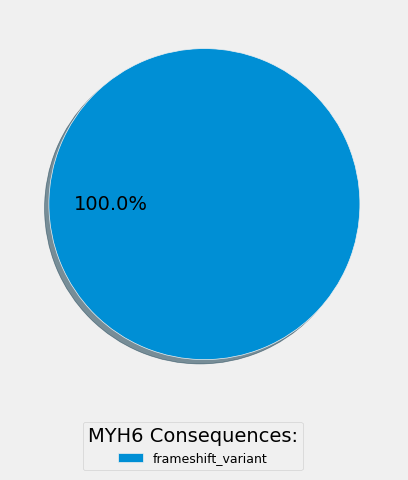

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.pie(test3.column('count'), autopct='%1.1f%%', shadow = True)
#,labels = test3.column('Our Consequences'), autopct='%1.1f%%', shadow = True)
plt.legend(title = 'MYH6 Consequences:', fontsize="9", labels = test3.column('Our Consequences'), loc ="lower center", bbox_to_anchor=(0.37, -0.2, 0.2, 0.2))

In [11]:
MYH6_VUS = pd.read_csv('MYH6_VUS.txt', sep='\t')
newMYH6_VUS = MYH6_VUS['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
MYH6_VUS1 = MYH6_VUS[newMYH6_VUS].dropna(subset=['Protein change'])
MYH6_VUS1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
1,NM_002471.4(MYH6):c.5809G>A (p.Asp1937Asn),MYH6,D1937N,Hypertrophic cardiomyopathy 14|not provided|Ca...,"Uncertain significance(Last reviewed: Aug 28, ...","criteria provided, multiple submitters, no con...",VCV000239180,14,23851260,14.0,23382051,239180,241796,rs878854503,NC_000014.9:23382050:C:T,NaN
2,NM_002471.4(MYH6):c.5805G>T (p.Met1935Ile),MYH6,M1935I,Cardiovascular phenotype|Hypertrophic cardiomy...,"Uncertain significance(Last reviewed: May 2, 2...","criteria provided, multiple submitters, no con...",VCV000955979,14,23851264,14.0,23382055,955979,948484,rs372265811,NC_000014.9:23382054:C:A,NaN
4,NM_002471.4(MYH6):c.5804T>C (p.Met1935Thr),MYH6,M1935T,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: Sep 24, ...","criteria provided, single submitter",VCV001426625,14,23851265,14.0,23382056,1426625,1366298,NaN,NC_000014.9:23382055:A:G,NaN
8,NM_002471.4(MYH6):c.5794A>T (p.Lys1932Ter),MYH6,K1932*,Cardiovascular phenotype|Atrial septal defect ...,"Uncertain significance(Last reviewed: Apr 4, 2...","criteria provided, multiple submitters, no con...",VCV000566642,14,23851639,14.0,23382430,566642,568757,rs763914096,NC_000014.9:23382429:T:A,NaN
10,NM_002471.4(MYH6):c.5788G>A (p.Gly1930Ser),MYH6,G1930S,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: Aug 31, ...","criteria provided, single submitter",VCV001389860,14,23851645,14.0,23382436,1389860,1373460,NaN,NC_000014.9:23382435:C:T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,NM_002471.4(MYH6):c.35C>T (p.Ala12Val),LOC114827851|MYH6,A12V,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: Oct 4, 2...","criteria provided, single submitter",VCV000537952,14,23876398,14.0,23407189,537952,528068,rs562487638,NC_000014.9:23407188:G:A,NaN
1087,NM_002471.4(MYH6):c.33del (p.Ala12fs),LOC114827851|MYH6,A12fs,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: Nov 7, 2...","criteria provided, single submitter",VCV000961480,14,23876400,14.0,23407191,961480,948495,rs1891817183,NC_000014.9:23407190:T:,NaN
1088,NM_002471.4(MYH6):c.17T>C (p.Met6Thr),LOC114827851|MYH6,M6T,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: Aug 31, ...","criteria provided, single submitter",VCV000843606,14,23876416,14.0,23407207,843606,841242,rs1270444359,NC_000014.9:23407206:A:G,NaN
1089,NM_002471.4(MYH6):c.15G>C (p.Gln5His),MYH6|LOC114827851,Q5H,Hypertrophic cardiomyopathy 14,"Uncertain significance(Last reviewed: May 11, ...","criteria provided, single submitter",VCV001993011,14,23876418,14.0,23407209,1993011,2052664,NaN,NC_000014.9:23407208:C:G,NaN


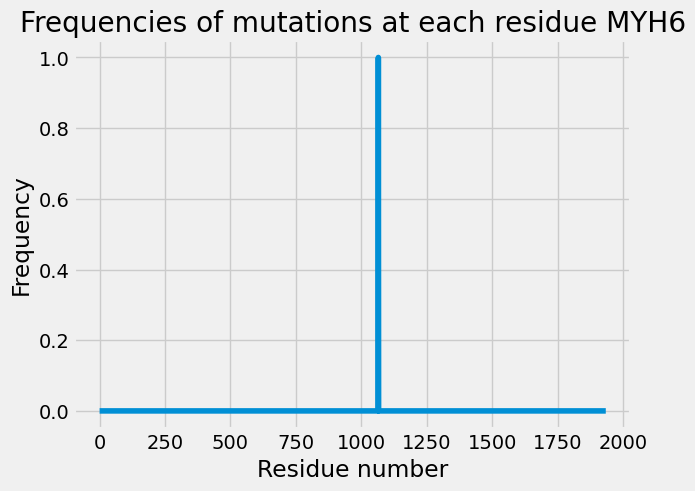

In [15]:
num_amino_acids_myh6 = 1935

count = [0] * num_amino_acids_myh6

for i in MYH6_Path.index:
    s = MYH6_Path['Protein change'][i].replace('*', '')
    x = "".join([ele for ele in s if ele.isnumeric()])
    if x:
        x_value = int(x)
        count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_myh6)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue MYH6')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('mybpc3.png')

plt.close()

In [17]:
f = open("mybpc3_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_myh6):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()